<a href="https://colab.research.google.com/github/RohanNayak12/CustomerChurnPrediction/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rjmanoj_credit_card_customer_churn_prediction_path = kagglehub.dataset_download('rjmanoj/credit-card-customer-churn-prediction')

print('Data source import complete.')


Data source import complete.


In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(rjmanoj_credit_card_customer_churn_prediction_path):
  for filename in filenames:
    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1/Churn_Modelling.csv


In [75]:
df=pd.read_csv('/root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1/Churn_Modelling.csv')
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [76]:
df.info()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
0


In [77]:
df['Exited'].value_counts()
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [78]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [79]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)
print(x_train_scaled)

[[-0.23082038 -0.94449979 -0.70174202 ...  1.71490137 -0.57273139
   0.91509065]
 [-0.25150912 -0.94449979 -0.35520275 ... -0.58312392 -0.57273139
  -1.09278791]
 [-0.3963303   0.77498705  0.33787579 ...  1.71490137 -0.57273139
  -1.09278791]
 ...
 [ 0.22433188  0.58393295  1.3774936  ... -0.58312392 -0.57273139
  -1.09278791]
 [ 0.13123255  0.01077067  1.03095433 ... -0.58312392 -0.57273139
  -1.09278791]
 [ 1.1656695   0.29735181  0.33787579 ...  1.71490137 -0.57273139
   0.91509065]]


In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [82]:
from tensorflow.keras import regularizers
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=11,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5,activation='relu',input_dim=11,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
trained_model=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5755 - loss: 0.8211 - val_accuracy: 0.7931 - val_loss: 0.6109
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.5880 - val_accuracy: 0.7975 - val_loss: 0.5349
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.5198 - val_accuracy: 0.7975 - val_loss: 0.4994
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4864 - val_accuracy: 0.7975 - val_loss: 0.4787
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8012 - loss: 0.4720 - val_accuracy: 0.7975 - val_loss: 0.4658
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8120 - loss: 0.4447 - val_accuracy: 0.8125 - val_loss: 0.4539
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4439 - val_accuracy: 0.8144 - val_loss: 0.4413
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.4271 - val_accu

In [84]:
model.layers[1].get_weights()

[array([[-2.74794629e-42,  4.42670185e-42, -9.31863479e-42,
          1.82252878e-41, -8.94869199e-42],
        [-3.50422707e-41,  3.99790452e-42,  1.98884413e-01,
         -3.21715683e-01,  1.84705183e-01],
        [ 8.08409084e-42,  9.45876463e-42, -4.01100742e-35,
          1.08965546e-23, -4.65806800e-38],
        [-1.77292282e-41,  1.07171307e-41, -7.59058818e-02,
          1.17274046e-01, -7.22414181e-02],
        [-3.36689982e-41, -4.49116158e-42, -1.48648202e-01,
          2.28345528e-01, -1.42024294e-01],
        [-1.23174135e-42,  9.59328929e-42, -2.38833368e-01,
          3.33954483e-01, -2.25002423e-01],
        [-4.31599927e-43, -6.93222350e-42, -2.39897579e-01,
          3.51556778e-01, -2.29621291e-01],
        [-1.67174907e-41, -1.39625379e-41, -8.78132135e-02,
          1.20345145e-01, -8.22231919e-02],
        [ 3.61955393e-42,  1.01776307e-41,  2.03144059e-01,
         -2.91860223e-01,  1.89665839e-01],
        [-5.49168868e-42,  1.33515718e-41, -1.43143490e-01,
    

In [85]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [86]:
y_pred=np.where(y_log>0.5,1,0)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [88]:
import matplotlib.pyplot as plt
trained_model.history


{'accuracy': [0.6926562786102295,
  0.796875,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.8009374737739563,
  0.8148437738418579,
  0.8223437666893005,
  0.8365625143051147,
  0.8421875238418579,
  0.8492187261581421,
  0.8517187237739563,
  0.8557812571525574,
  0.8551562428474426,
  0.8564062714576721,
  0.8581249713897705,
  0.8581249713897705,
  0.8589062690734863,
  0.8598437309265137,
  0.859375,
  0.8609374761581421,
  0.8590624928474426,
  0.8618749976158142,
  0.8607812523841858,
  0.8603125214576721,
  0.8598437309265137,
  0.8600000143051147,
  0.8617187738418579,
  0.8610937595367432,
  0.8592187762260437,
  0.8612499833106995,
  0.8615624904632568,
  0.8615624904632568,
  0.8620312213897705,
  0.8606250286102295,
  0.8607812523841858,
  0.8610937595367432,
  0.8603125214576721,
  0.8603125214576721,
  0.8612499833106995,
  0.8612499833106995,
  0.8621875047683716,
  0.8610937595367432,
  0.8615624904632568,
  0.862500011920929,
  0.861406266689300

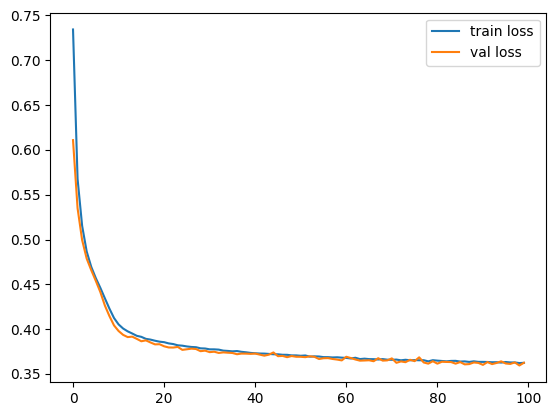

In [89]:
plt.plot(trained_model.history['loss'],label='train loss')
plt.plot(trained_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()

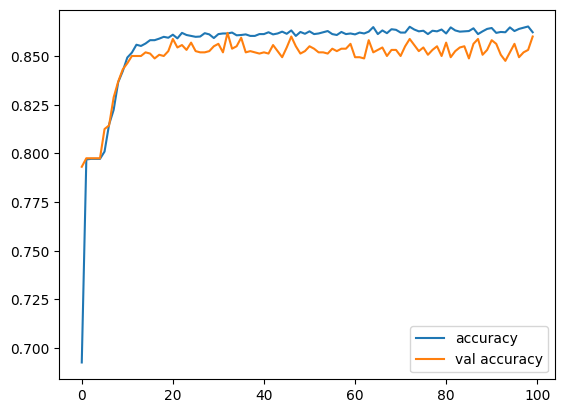

In [90]:
plt.plot(trained_model.history['accuracy'],label='accuracy')
plt.plot(trained_model.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()